In [48]:
from pyvis.network import Network
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [59]:
df_1 = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/FMF_Network.txt')
df_1.A = df_1['A'].astype(str)
df_1.B = df_1['B'].astype(str)
df_2 = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/FMF_Network2.txt')
df_2.A = df_2['A'].astype(str)
df_2 = df_2.groupby(['A','B']).sum()
df_2.to_csv('Zetas.csv')
df_2 = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/Zetas.csv')
df = pd.concat([df_1, df_2], ignore_index=True, sort=False)
df

,A,B,Weight
0,2,1992,1
1,2,1993,1
2,2,1994,1
3,2,1999,1
4,7,1998,1
5,9,1994,1
6,11,1994,1
7,15,1994,1
8,15,1996,1
9,15,1999,1


In [60]:
x = df.values.tolist()
x

[['2', '1992', 1],
 ['2', '1993', 1],
 ['2', '1994', 1],
 ['2', '1999', 1],
 ['7', '1998', 1],
 ['9', '1994', 1],
 ['11', '1994', 1],
 ['15', '1994', 1],
 ['15', '1996', 1],
 ['15', '1999', 1],
 ['17', '1999', 1],
 ['20', '1998', 1],
 ['21', '1998', 1],
 ['22', '1994', 1],
 ['25', '1992', 1],
 ['25', '1993', 1],
 ['25', '1994', 1],
 ['25', '1999', 1],
 ['26', '1993', 1],
 ['26', '1994', 1],
 ['26', '1999', 1],
 ['27', '1998', 1],
 [1992, 'Zetas', 2],
 [1993, 'Zetas', 3],
 [1994, 'Zetas', 10],
 [1996, 'Zetas', 1],
 [1998, 'Zetas', 5],
 [1999, 'Zetas', 5]]

In [4]:
df[0:1]

,A,B,Weight
0,2,1992,1


In [61]:
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
for i in df_1.A.unique():
    name = str(i)
    net.add_node(name, color = 'red')

for i in df_1.B.unique():
    name = str(i)
    net.add_node(name, color = 'blue')

net.add_node('Zetas', color = 'green')


for i in range(len(x)):
    edge = x[i]
    add = -1

    for o in range(len(edge)):
        add = add + 1
        
        if add == 0:
            A = edge[add]
            
        elif add == 1:
            B = edge[add]
            
        else:
            W = edge[add]
    
    net.add_edge(str(A), str(B) ,velue=int(W))
    print(W)




net.show('xxx.html')
    

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
10
1
5
5


2 1992 1
2 1993 1
2 1994 1
2 1999 1
7 1998 1
9 1994 1
11 1994 1
15 1994 1
15 1996 1
15 1999 1
17 1999 1
20 1998 1
21 1998 1
22 1994 1
25 1992 1
25 1993 1
25 1994 1
25 1999 1
26 1993 1
26 1994 1
26 1999 1
27 1998 1
1992 Zetas 2
1993 Zetas 3
1994 Zetas 10
1996 Zetas 1
1998 Zetas 5
1999 Zetas 5


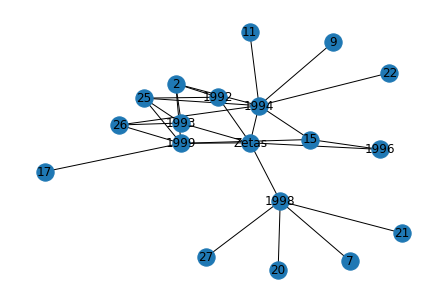

In [62]:
G = nx.Graph()

for i in df_1.A.unique():
    name = str(i)
    G.add_node(name, color = 'red')

for i in df_1.B.unique():
    name = str(i)
    G.add_node(name, color = 'blue')

G.add_node('Zetas', color = 'green')


for i in range(len(x)):
    edge = x[i]
    add = -1

    for o in range(len(edge)):
        add = add + 1
        
        if add == 0:
            A = edge[add]
            
        elif add == 1:
            B = edge[add]
            
        else:
            W = edge[add]
    G.add_edge(str(A), str(B) ,weight=int(W))
    print(A,B,W)


nx.draw(G,with_labels=True)

    

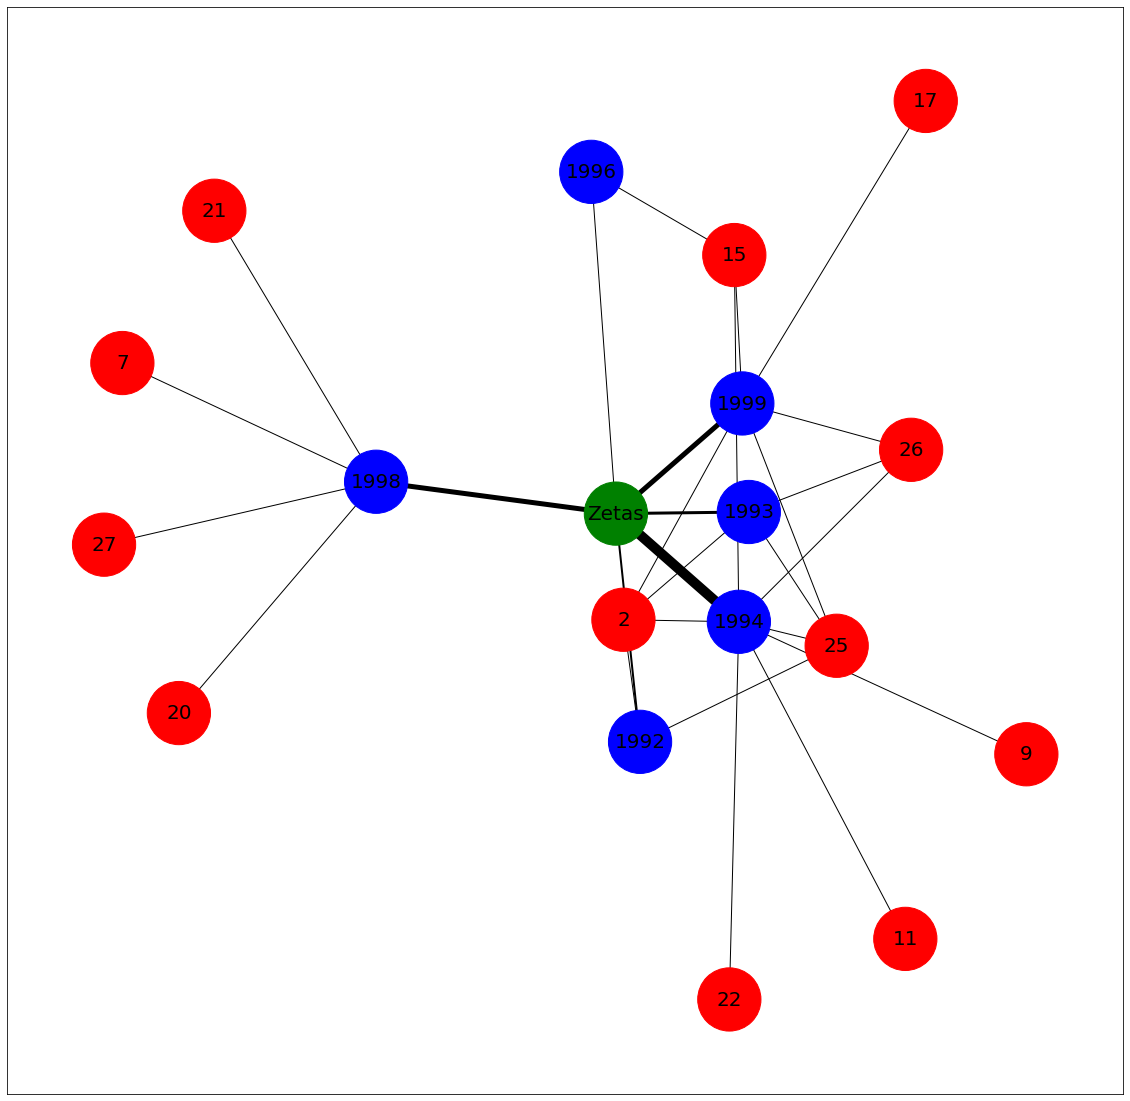

In [83]:
all_weights=[]
for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness

nodes_color=[]
for (node1,data) in G.nodes(data=True):
        nodes_color.append(data['color']) #we'll use this when determining edge thickness


unique_weights = list(set(all_weights))

for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        width = weight
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)

nx.draw_networkx_nodes(G, pos,node_color=nodes_color, node_size=4000)

nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

pass
